In [1]:
import pandas as pd
import numpy as np 

In [2]:
diabetes= pd.read_csv("E:\Data Science Institute\Datasets\diabetes.csv")

In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EXPLORATORY DATA ANALYSIS

In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Diabetes outcome ratio

<AxesSubplot:>

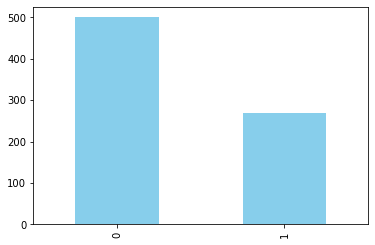

In [8]:
diabetes['Outcome'].value_counts().plot.bar(color='skyblue')

In [9]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Investigating BMI by outcome

<AxesSubplot:xlabel='Outcome'>

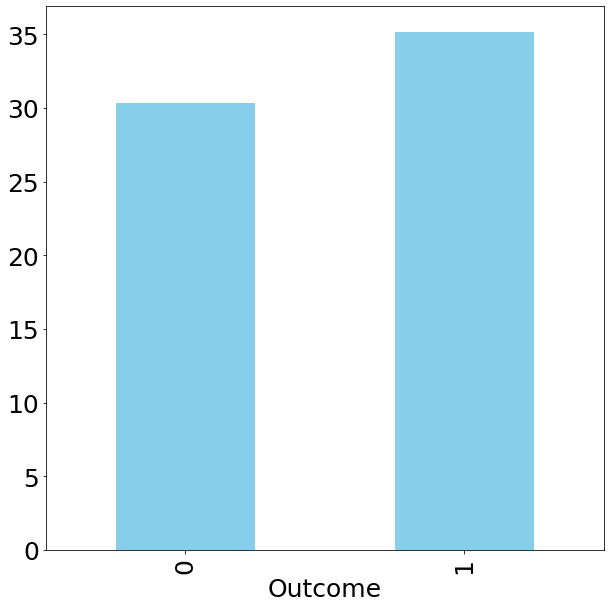

In [67]:
diabetes.groupby('Outcome')['BMI'].mean().plot.bar(color='skyblue')

## Investigating diabetes pedigree function by outcome

<AxesSubplot:xlabel='Outcome'>

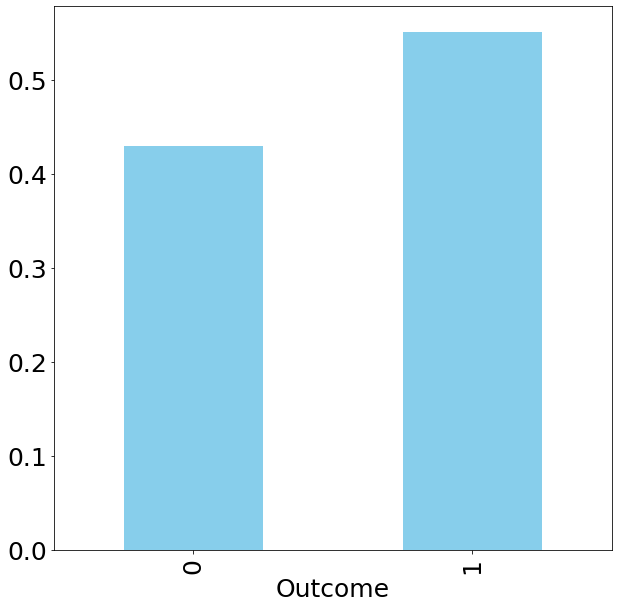

In [68]:
diabetes.groupby('Outcome')['DiabetesPedigreeFunction'].mean().plot.bar(color='skyblue')

## Distribution of number of pregnancies 

<AxesSubplot:>

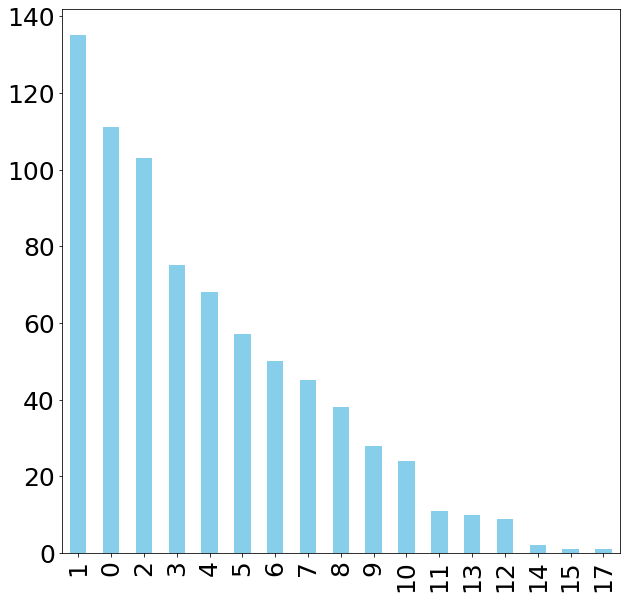

In [46]:
diabetes['Pregnancies'].value_counts().plot.bar(color='skyblue')

# Checking for outliers

<AxesSubplot:>

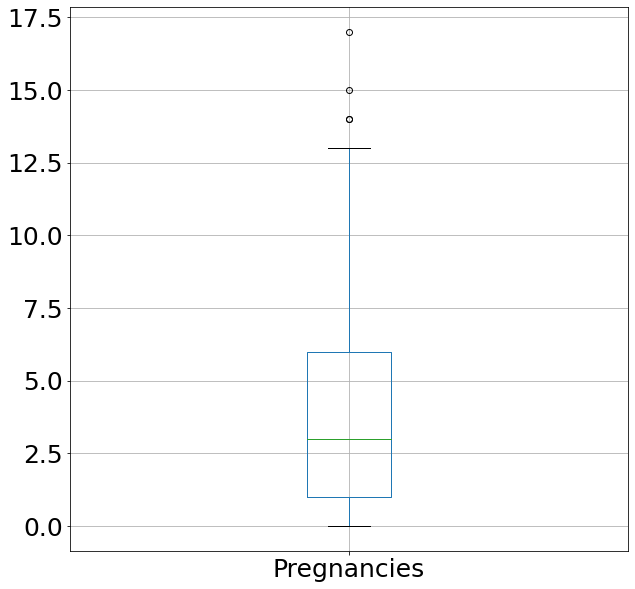

In [69]:
diabetes[['Pregnancies']].boxplot()

<AxesSubplot:>

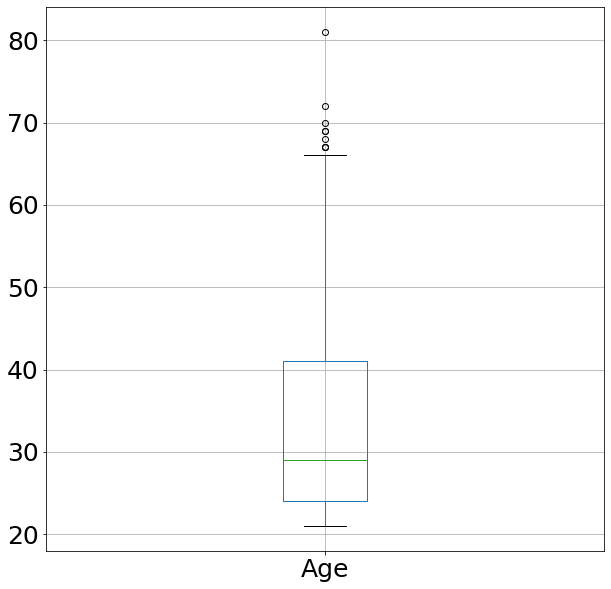

In [70]:
diabetes[['Age']].boxplot()

<AxesSubplot:>

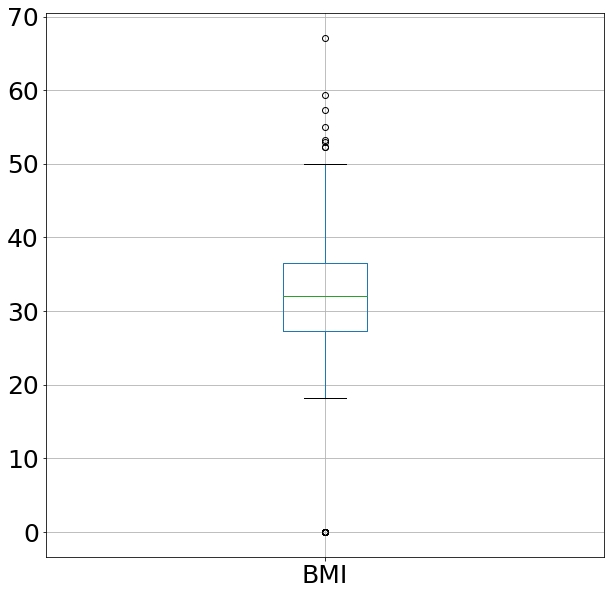

In [71]:
diabetes[['BMI']].boxplot()

# Inspecting pair plot of features

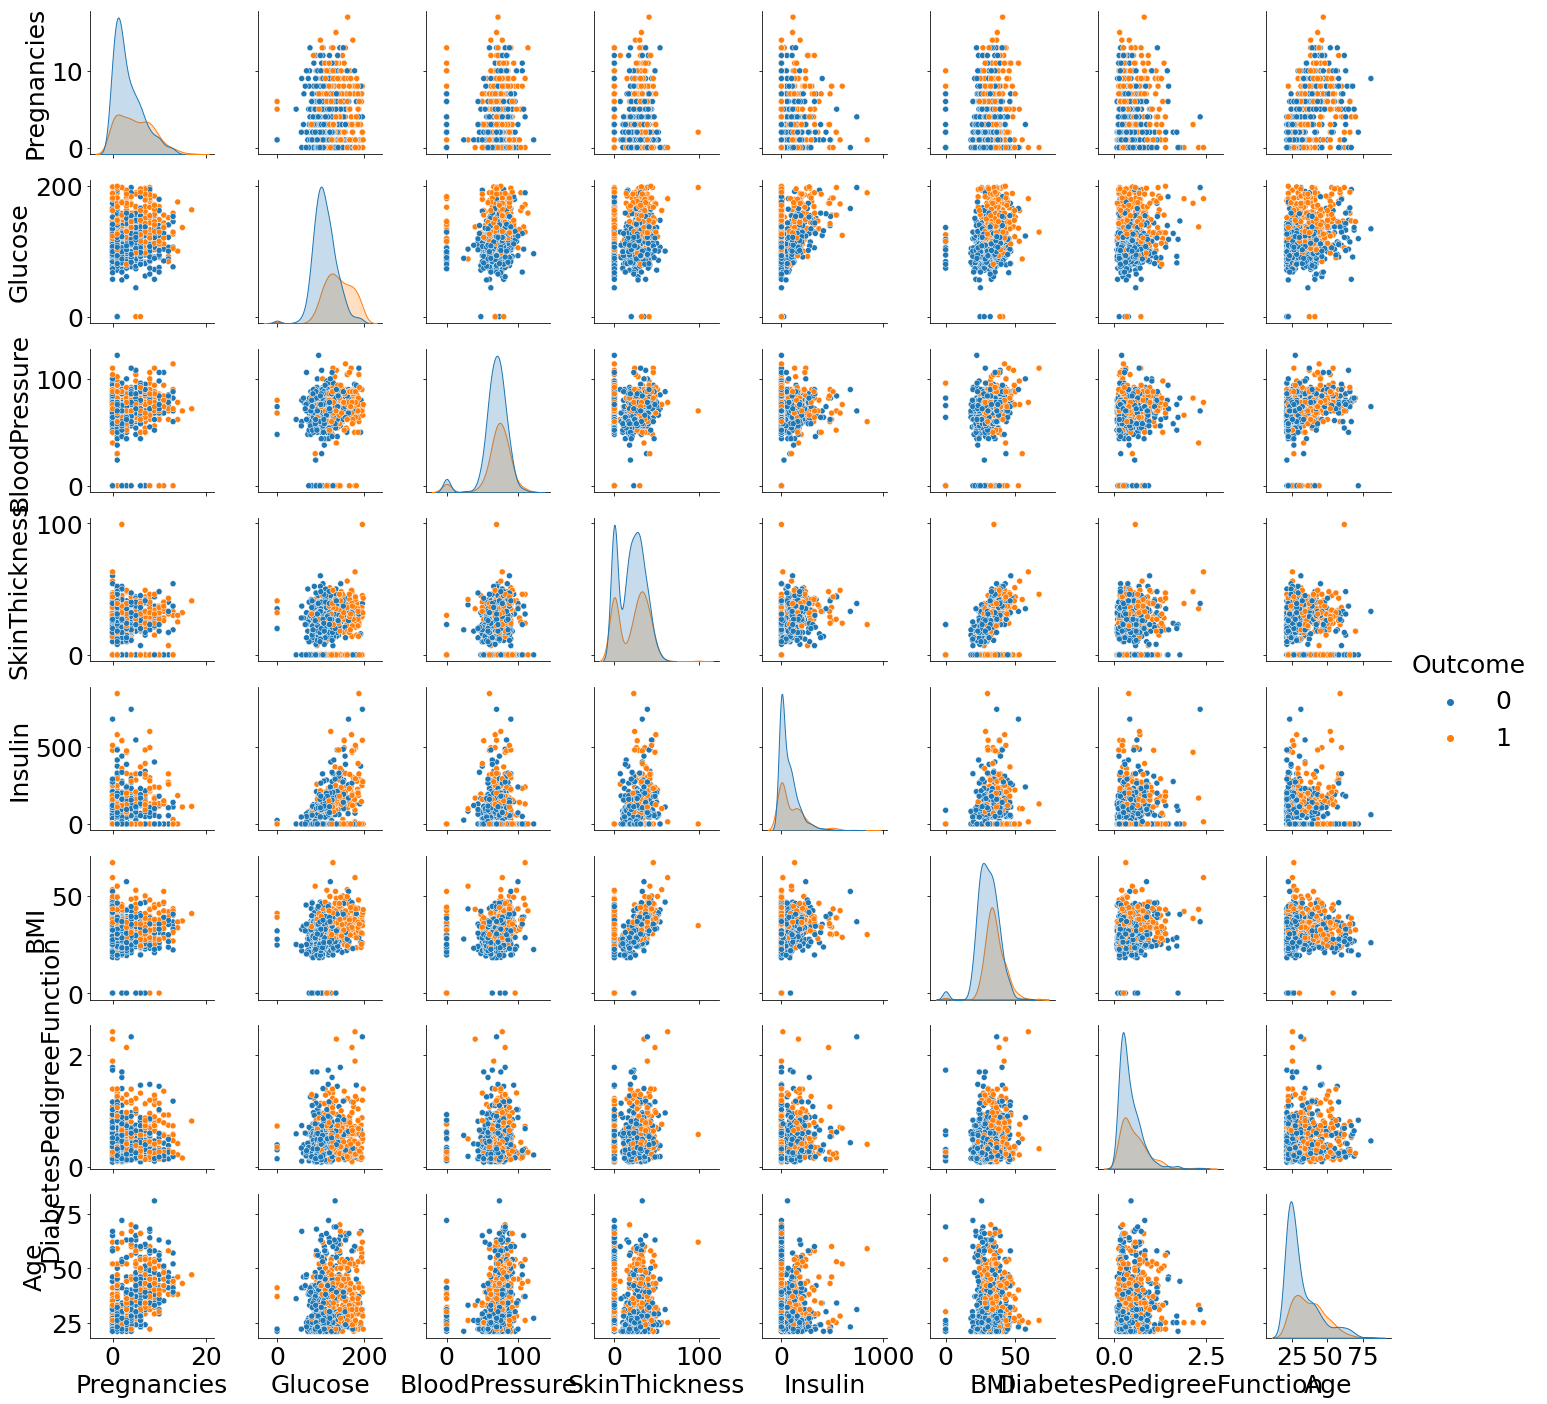

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 10)
sns.pairplot(diabetes , hue='Outcome')

# Checking correlation

<AxesSubplot:>

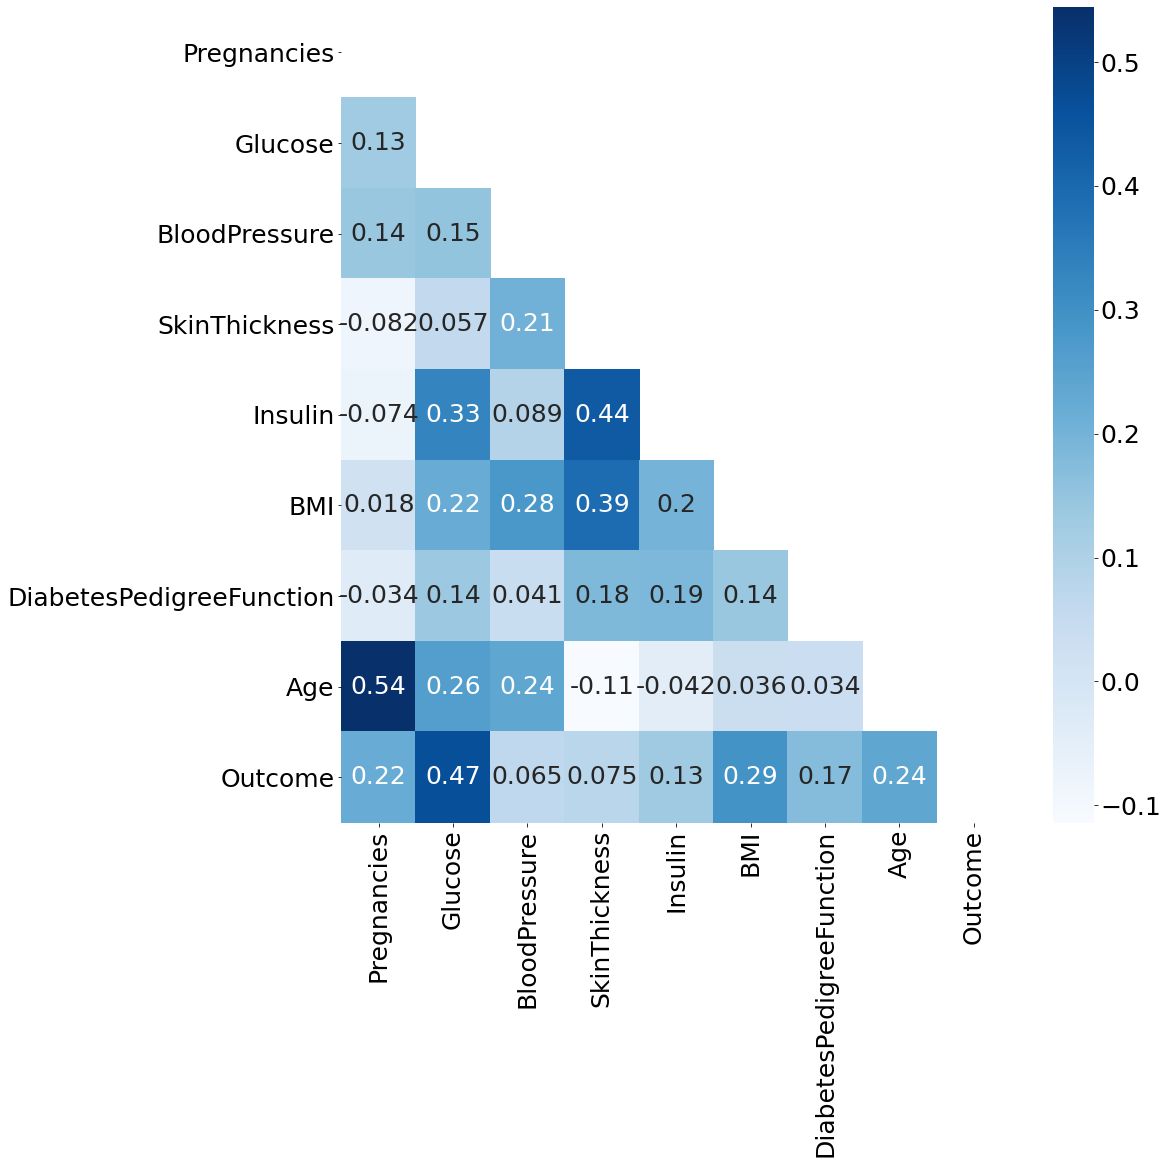

In [73]:
corr = diabetes.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask
plt.figure(figsize=(15, 15))           
sns.heatmap(corr, cmap="Blues", annot=True, mask=matrix)

## Investigating blood pressure and glucose relationship

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

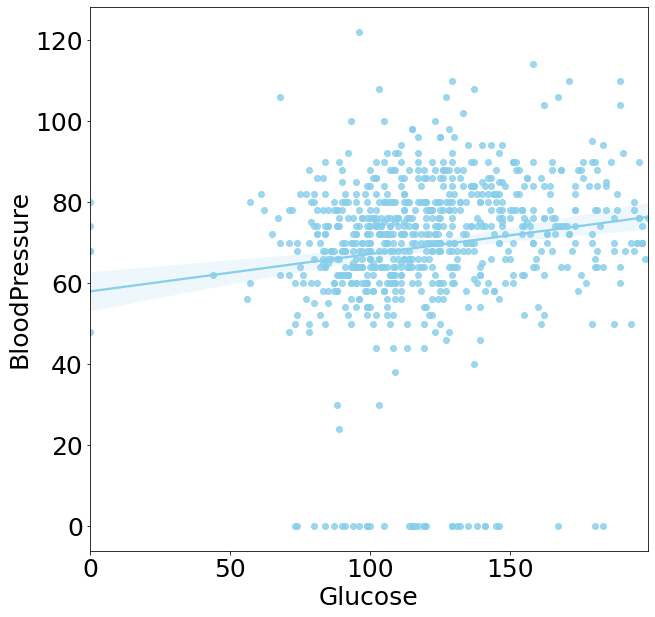

In [74]:
sns.regplot(data=diabetes, x="Glucose", y="BloodPressure",color='skyblue')

## Investigating relationship between blood pressure and BMI 

<AxesSubplot:xlabel='BMI', ylabel='BloodPressure'>

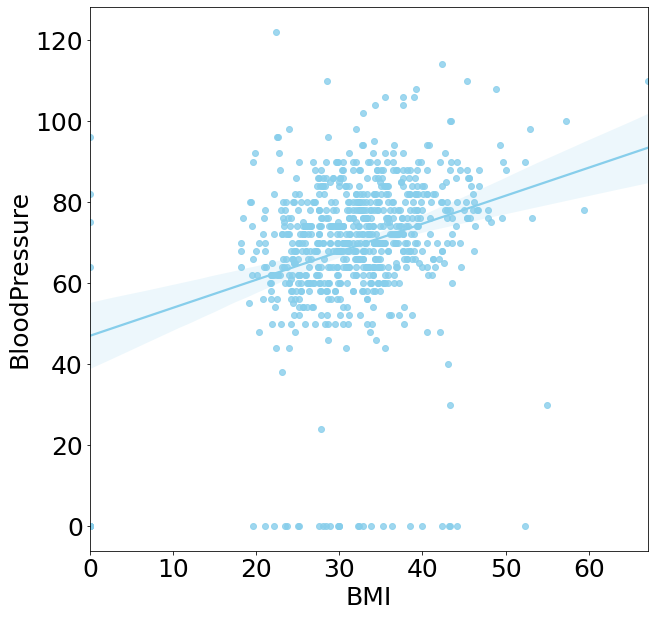

In [75]:
sns.regplot(data=diabetes, x="BMI", y="BloodPressure",color='skyblue')

## Scaling features to improve model performance 

In [76]:
features_unchanged = ['Outcome', 'Pregnancies']
features_to_scale = [col for col in diabetes.columns if col not in features_unchanged] 

scaled_features = diabetes[features_to_scale]
original_features = diabetes[features_unchanged]

#Import the scaling function 
from sklearn.preprocessing import StandardScaler 

#Initialise scaling function 
scaler = StandardScaler()


scaled_data = scaler.fit_transform(scaled_features)


#Convert output (Series) to Data Frame 

scaled_data = pd.DataFrame(scaled_data, columns=features_to_scale)

diabetes_scaled = pd.concat([original_features, scaled_data], axis=1)


In [77]:
diabetes_scaled.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,6,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,0,1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1,8,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,0,1,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,1,0,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# Model Building 

In [79]:
X = diabetes.drop(['Outcome'], axis='columns')
y = diabetes['Outcome']

In [80]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=8)

### 20% data used for training to reduce hyperparameter tuning time duration 

## Tuning hyperparameters

In [81]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, roc_auc_score

In [26]:
import optuna
from sklearn.svm import SVC

def objective(trial):
    
    params = {
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'gamma': trial.suggest_float('gamma', 1e-3, 1e2, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
             }
    
    model = SVC(**params, random_state=1143)  

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)

In [27]:
svm_study = optuna.create_study(direction='maximize') # Direction set to maximise AUC
svm_study.optimize(objective, n_trials=50)


[I 2023-11-30 01:09:44,059] A new study created in memory with name: no-name-37609d24-7b18-4490-8e54-705d9d319173
[I 2023-11-30 01:09:44,070] Trial 0 finished with value: 0.6504065040650406 and parameters: {'C': 712.6106107018409, 'gamma': 1.6461175504005632, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.6504065040650406.
[I 2023-11-30 01:09:44,079] Trial 1 finished with value: 0.6504065040650406 and parameters: {'C': 0.15255149468967252, 'gamma': 20.73541937275271, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.6504065040650406.
[I 2023-11-30 01:10:11,689] Trial 2 finished with value: 0.6536585365853659 and parameters: {'C': 0.10874197578349264, 'gamma': 25.55961510591584, 'kernel': 'poly'}. Best is trial 2 with value: 0.6536585365853659.
[I 2023-11-30 01:10:11,697] Trial 3 finished with value: 0.6504065040650406 and parameters: {'C': 66.3999019891966, 'gamma': 2.328438191438664, 'kernel': 'sigmoid'}. Best is trial 2 with value: 0.6536585365853659.
[I 2023-11-30 01:10:14,80

In [ ]:
optuna.visualization.plot_optimization_history(svm_study).show() # Plot results of study 

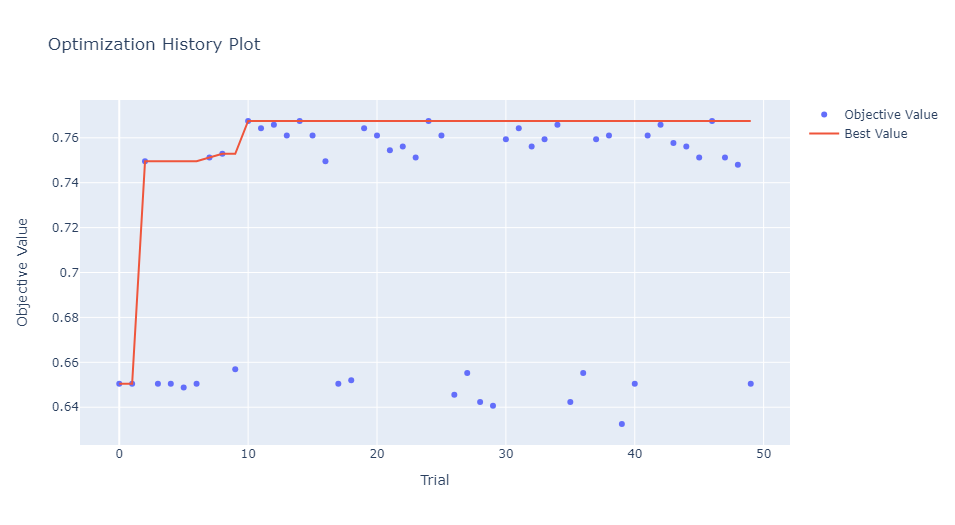

In [29]:
best_svm_params = svm_study.best_params # Get best hyperparameters for the model 

print('Best params:'')

for key, value in svm_study.best_params.items():
    print(f"\t{key}: {value}")

Best params:
	C: 0.03253088442379268
	gamma: 7.476085969939212
	kernel: linear


In [82]:
# Train model with best hyperparameters 

svm_model = SVC(C = best_svm_params['C'],
              gamma = best_svm_params['gamma'],
              kernel = best_svm_params['kernel'],
              random_state=65,
              max_iter=10000
                         )


C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(C=0.03253088442379268, gamma=7.476085969939212, kernel='linear',
    max_iter=10000, random_state=65)

## Running 10-Fold cross validation 

In [35]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score


scoring = {"AUC": "roc_auc", 'accuracy': 'accuracy'}

results = cross_validate(svm_model, X, y, cv=10, return_train_score=False, scoring=list(scoring.values()))


print('10-fold cross-validation results:')
for sc in range(len(scoring)):
    print(svm_model.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean(), results['test_%s' % list(scoring.values())[sc]].std()))

C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

10-fold cross-validation results:
SVC average AUC: -0.762 (+/-0.061)
SVC average accuracy: -0.729 (+/-0.070)


C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [83]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

training_scores =[]
testing_scores = []

# Iterate over each fold

for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model = svm_model.fit(X_train, y_train)

    # Evaluate the model and store the accuracy score
    training = svm_model.score(X_train, y_train)
    testing = svm_model.score(X_test, y_test)
    training_scores.append(training)
    testing_scores.append(testing) 

for i, (train, test) in enumerate(zip(training_scores, testing_scores), 1):
    print(f'Fold {i}: Training set accuracy = {train:.4f}, Testing set accuracy = {test:.4f}')

print(f'Average Training set accuracy: {np.mean(training_scores):.4f}')
print(f'Average Testing set accuracy: {np.mean(testing_scores):.4f}')


C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

Fold 1: Training set accuracy = 0.7583, Testing set accuracy = 0.6494
Fold 2: Training set accuracy = 0.7713, Testing set accuracy = 0.7922
Fold 3: Training set accuracy = 0.7467, Testing set accuracy = 0.7532
Fold 4: Training set accuracy = 0.7627, Testing set accuracy = 0.8312
Fold 5: Training set accuracy = 0.7511, Testing set accuracy = 0.7792
Fold 6: Training set accuracy = 0.7873, Testing set accuracy = 0.6623
Fold 7: Training set accuracy = 0.7381, Testing set accuracy = 0.7792
Fold 8: Training set accuracy = 0.7641, Testing set accuracy = 0.7273
Fold 9: Training set accuracy = 0.7153, Testing set accuracy = 0.7368
Fold 10: Training set accuracy = 0.7731, Testing set accuracy = 0.7632
Average Training set accuracy: 0.7568
Average Testing set accuracy: 0.7474


C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


### Average scores of training and test sets are comparable, ruling out overfitting

In [84]:
# Selecting Fold 4 because of highest testing set accuracy

model_number = 4
for i, (train_index, test_index) in enumerate(kfold.split(X, y), 1):
    if i == model_number:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

svm_model.fit(X_train, y_train)

C:\Users\Lenovo 88\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(C=0.03253088442379268, gamma=7.476085969939212, kernel='linear',
    max_iter=10000, random_state=65)

# MODEL EVALUATION 

# Confusion matrix 

In [85]:
y_pred_test = svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[51  4]
 [ 9 13]]

True Negatives(TN) =  51

True Positives(TP) =  13

False Positives(FP) =  4

False Negatives(FN) =  9


In [86]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    text-align: center;
    vertical-align: middle;
}
</style>
""")

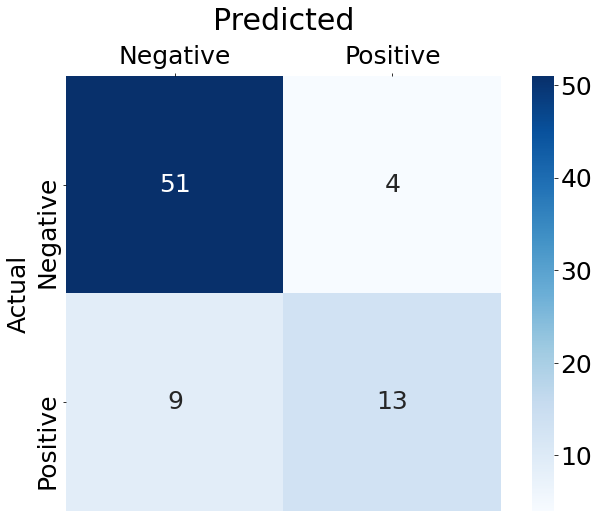

In [87]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11, 8))

confusion_matrix = pd.DataFrame(data=cm, columns=['Negative', 'Positive'],
                                index=['Negative', 'Positive'])

sns.heatmap(confusion_matrix, annot=True, fmt='', cmap='Blues', square=True)

ax.xaxis.tick_top()
ax.set_title('Predicted', pad=15)
plt.ylabel('Actual')
plt.show()

## Classification report 

In [40]:
target_names = ['Diabetes absent', 'Diabetes present']

print(classification_report(y_test, y_pred_test, target_names=target_names))

                  precision    recall  f1-score   support

 Diabetes absent       0.85      0.93      0.89        55
Diabetes present       0.76      0.59      0.67        22

        accuracy                           0.83        77
       macro avg       0.81      0.76      0.78        77
    weighted avg       0.83      0.83      0.82        77



## Receiver Operating Curve

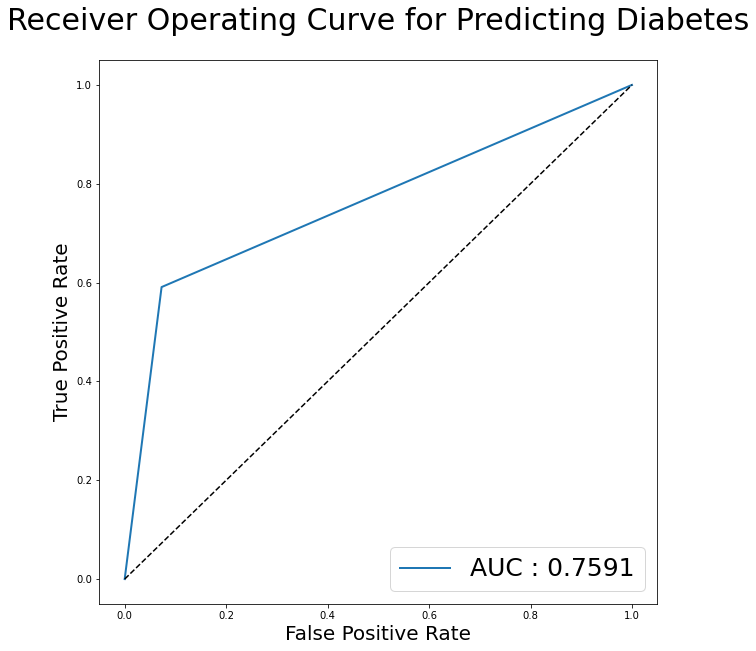

In [41]:
# Calculate AUC 

AUC = roc_auc_score(y_test, y_pred_test)

#Plot ROC

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test, pos_label=True)

plt.figure(figsize=(10,10))

plt.plot(fpr, tpr, linewidth=2, label="AUC : {:.4f}".format(AUC))

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 25

plt.title('Receiver Operating Curve for Predicting Diabetes', fontsize=30, pad=30)

plt.xlabel('False Positive Rate' , fontsize=20)

plt.ylabel('True Positive Rate', fontsize=20)

plt.legend(loc=4)

plt.show()